<a href="https://colab.research.google.com/github/mukulsn/Machine-Learning/blob/main/Tensorflow%20Developer%20Certificate/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import helper_functions

Copy file to drive

In [2]:
!cp /content/helper_functions.py "/content/drive/MyDrive/Colab Notebooks/ML projects/Tensorflow projects/Tensorflow Developer Certificate/"

download file from github

In [1]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-12-02 09:09:08--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-12-02 09:09:08 (100 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [3]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-12-02 09:09:21--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 74.125.134.207, 74.125.139.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-12-02 09:09:21 (107 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
# The test data doesn't have a target (that's what we'd try to predict)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [10]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'Target: {target}', "(real disaster)" if target > 0 else "(not real disaster)")
  print(f'Text:\n{text}\n')
  print("----\n")

Target: 1 (real disaster)
Text:
Wreck with road blockage Woodward Avenue Northbound at Davison in M.S. #shoalstraffic

----

Target: 0 (not real disaster)
Text:
Like it affects every level of life you're expecting me to buy everything and still survive with my limited pocket money

----

Target: 1 (real disaster)
Text:
#WorldNews Fallen powerlines on G:link tram: UPDATE: FIRE crews have evacuated up to 30 passengers who were tr... http://t.co/EYSVvzA7Qm

----

Target: 1 (real disaster)
Text:
Has gun law ever dissuaded a potential mass murderer?

----

Target: 1 (real disaster)
Text:
In memory of the victims of Hiroshima and Nagasaki. Never again! Ban nuclear weapons! : https://t.co/J3cIRXjFa6

----



In [18]:
# splitting dataset
from sklearn.model_selection import train_test_split

# Use tran_test_split to split training datainto training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(), # to convert into numpy arrays for tensorflow
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1, # 10% of validation set
                                                                            random_state=42)

In [19]:
# check the lengths
len(train_sentences), len(train_labels),len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [22]:
# View data
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [23]:
# tokenisation
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TesorFlow 2.6

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocab
                                    standardize='lower_and_strip_punctuation', # how to process text
                                    split='whitespace', # how to split tokens
                                    ngrams=None, # create group of n-words?
                                    output_mode='int', # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [46]:
# get total number of words in training data
li = []
for i in train_df_shuffled['text']:
  li = li + i.split(' ')

len(set(li)), 'number of words in train data'

(32017, 'number of words in train data')

In [45]:
# Find average number of tokens (words) in training Tweets
a = sum([len(i.split()) for i in train_sentences])
b = len(train_sentences)
round(a/b), 'avg number of tokens '

(15, 'avg number of tokens ')

In [48]:
# text vectorizer
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                 output_mode='int',
                                 output_sequence_length=max_length)

In [49]:
# fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [50]:
# create sample sentence and tokenize it
sample_sentence = 'Theres is a flood in street'
text_vectorizer(sample_sentence)

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([264,   9,   3, 232,   4, 698,   0,   0,   0,   0,   0,   0,   0,
         0,   0])>

In [51]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Boy saves autistic brother from drowning: A nine-year-old in Maine dove into a pool to save his autistic brother from drowning      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 291, 8786, 6156, 1431,   20,  513,    3,    1,    4,    1,    1,
          66,    3, 1616,    5]])>

In [52]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f'number of words in vocab: {len(words_in_vocab)}')
print(f'top 5 most common words : {top_5_words}')
print(f'bottom 5 least common words : {bottom_5_words}')


number of words in vocab: 10000
top 5 most common words : ['', '[UNK]', 'the', 'a', 'in']
bottom 5 least common words : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [54]:
# embedding layer
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, # set input shape
                             output_dim = 128, # set size of embedding vector
                             embeddings_initializer='uniform', # default, initialize randomly
                             input_length=max_length, # how long is each input
                             name='embedding_1')

In [55]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
ng2x5 mhtw4fnet

Watch Michael Jordan absolutely destroy this meme-baiting camper - FOXSportscom      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01217343,  0.01420129,  0.02885341, ...,  0.03348142,
          0.02028979, -0.00878358],
        [-0.0206206 , -0.03843652, -0.03633046, ..., -0.04689008,
         -0.00638193, -0.0180958 ],
        [-0.00903684, -0.04636906, -0.00569044, ...,  0.0103239 ,
         -0.00401168, -0.0110162 ],
        ...,
        [-0.00046645, -0.04553244,  0.00150986, ..., -0.01414269,
         -0.00186806, -0.02849197],
        [-0.00046645, -0.04553244,  0.00150986, ..., -0.01414269,
         -0.00186806, -0.02849197],
        [-0.00046645, -0.04553244,  0.00150986, ..., -0.01414269,
         -0.00186806, -0.02849197]]], dtype=float32)>

# Model 0: Base line

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()), # convert words to numbers using tfidf
    ('clf',MultinomialNB()) # model the text
])

# Fit the piepline to the training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [57]:
# the benefit of using a shallow model like Multinomial Naive Bayes is that training is very fast
baseline_score = model_0.score(val_sentences, val_labels)
print(f'Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%')

Our baseline model achieves an accuracy of: 79.27%


In [58]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [60]:
# creating evaluation function
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score
  """
  # calculate model accuracy
  model_accuracy = accuracy_score(y_true,y_pred) * 100
  # calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true,y_pred, average='weighted')
  model_results={'accuracy':model_accuracy,
                 'precision':model_precision,
                 'recall':model_recall,
                 'f1':model_f1}
  return model_results

In [62]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 1: A simple dense model

In [63]:
# create tensorboards callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = 'model_logs'

In [65]:
# Build the model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string') # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation='sigmoid')(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense') # construct the mdoel

In [66]:
# Before we can fit our model to the data, we've got to compile it.
# Since we're working with binary classification,
# we'll use "binary_crossentropy" as our loss function and the Adam optimizer.

# compile model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [67]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [69]:
# Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                    experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20231202-103157
Epoch 1/5
215/215 [==============================] - 8s 25ms/step - loss: 0.6092 - accuracy: 0.6949 - val_loss: 0.5352 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4403 - accuracy: 0.8196 - val_loss: 0.4689 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3458 - accuracy: 0.8618 - val_loss: 0.4589 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.2844 - accuracy: 0.8917 - val_loss: 0.4643 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2376 - accuracy: 0.9121 - val_loss: 0.4770 - val_accuracy: 0.7874


In [70]:
# check the results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 7ms/step - loss: 0.4770 - accuracy: 0.7874


[0.47701457142829895, 0.787401556968689]

In [71]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.01928667, -0.02621916,  0.02176032, ..., -0.03346973,
         -0.02164958, -0.01319674],
        [ 0.01000708,  0.01770484,  0.03256287, ...,  0.03071943,
          0.01683507, -0.00920117],
        [ 0.01270098, -0.00115405,  0.03811084, ..., -0.00163593,
          0.01541759,  0.06721995],
        ...,
        [ 0.01067771, -0.04488108,  0.02218569, ...,  0.01956948,
         -0.02002932, -0.0208563 ],
        [-0.03723757,  0.0796364 ,  0.00946593, ..., -0.00055278,
          0.01025013,  0.01892551],
        [-0.10193865,  0.03348579,  0.0681861 , ..., -0.08395875,
         -0.0202919 ,  0.08975481]], dtype=float32)>]

In [72]:
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [73]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
  --name "First deep model on text data" \
  --description "Trying a dense model with an embedding layer" \
  --one_shot # exits the uploader when upload has finished

2023-12-02 10:36:55.837255: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 10:36:55.837328: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 10:36:55.837374: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 10:36:57.723965: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of th

In [74]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilites

24/24 [==============================] - 0s 3ms/step


array([[0.4269778 ],
       [0.7447335 ],
       [0.99776745],
       [0.10987525],
       [0.11019091],
       [0.9332332 ],
       [0.90874946],
       [0.99263024],
       [0.969924  ],
       [0.26137292]], dtype=float32)

In [75]:
# Turn predictions probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [77]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1': 0.7846966492209201}

In [79]:
# comparing results
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [82]:
# creating a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key,value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key] - value:.2f}")
compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.74, Difference: -0.52
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


#RNN
Model 2: LSTM
```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

In [87]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                      output_dim=128,
                                      embeddings_initializer='uniform',
                                      input_length=max_length,
                                      name='embedding_2')

# create lstm model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x)
print(x.shape)
# x = layers.Dense(1, activation='sigmoid')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_LSTM')

(None, 15, 128)
(None, 64)


In [90]:
# compile model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [91]:

model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [93]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'LSTM')])

Saving TensorBoard log files to: model_logs/LSTM/20231202-111056
Epoch 1/5
215/215 [==============================] - 16s 59ms/step - loss: 0.5120 - accuracy: 0.7434 - val_loss: 0.4569 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 10s 48ms/step - loss: 0.3177 - accuracy: 0.8726 - val_loss: 0.5141 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 11s 53ms/step - loss: 0.2192 - accuracy: 0.9178 - val_loss: 0.5822 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 11s 53ms/step - loss: 0.1533 - accuracy: 0.9460 - val_loss: 0.6159 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 9s 44ms/step - loss: 0.1081 - accuracy: 0.9612 - val_loss: 0.8328 - val_accuracy: 0.7625


In [94]:
# make predictions on validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 [==============================] - 2s 15ms/step


((762, 1),
 array([[0.01808161],
        [0.71811485],
        [0.9995497 ],
        [0.07826222],
        [0.00211263],
        [0.99942917],
        [0.91184914],
        [0.99961936],
        [0.99947375],
        [0.18660156]], dtype=float32))

In [98]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [100]:
# calculate lstm results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 76.24671916010499,
 'precision': 0.7637525216162191,
 'recall': 0.7624671916010499,
 'f1': 0.7603795119224996}

In [104]:
# compare with baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 76.25, Difference: -3.02
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


# Model 3: GRU

In [110]:
# Set random seet and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_3')

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x=model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x=layers.Dense(64, activation='relu')(x) # optional dense layer after GRU cell
outputs=layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs,outputs,name='model_3_GRU')

In [111]:
# Compile GRU model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [112]:
model_3.summary() # GRU number of parameters are less in comparision to LSTM

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [114]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,'GRU')])

Saving TensorBoard log files to: model_logs/GRU/20231202-115025
Epoch 1/5
215/215 [==============================] - 16s 54ms/step - loss: 0.5246 - accuracy: 0.7322 - val_loss: 0.4548 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 15s 68ms/step - loss: 0.3168 - accuracy: 0.8713 - val_loss: 0.4894 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 15s 68ms/step - loss: 0.2156 - accuracy: 0.9191 - val_loss: 0.5597 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 15s 70ms/step - loss: 0.1513 - accuracy: 0.9466 - val_loss: 0.6340 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 14s 67ms/step - loss: 0.1139 - accuracy: 0.9600 - val_loss: 0.6162 - val_accuracy: 0.7677


In [115]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 3s 10ms/step


((762, 1),
 array([[0.4344521 ],
        [0.90067774],
        [0.9964701 ],
        [0.15305825],
        [0.00977884],
        [0.9918932 ],
        [0.8432426 ],
        [0.99642   ],
        [0.9950607 ],
        [0.3361159 ]], dtype=float32))

In [117]:
# Convert predictions probabilites to predictions classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [118]:
# Calculate model_3_results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_results)
model_3_results

{'accuracy': 76.77165354330708,
 'precision': 0.7673454393039123,
 'recall': 0.7677165354330708,
 'f1': 0.7671452951501907}

In [119]:
# compareto baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 76.77, Difference: -2.49
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


# Model 4: Bidirectional RNN Model

In [121]:
# set random seed and crate embedding layer (new embedding for each new model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_4')

# Build a bidirectional RNN model
inputs=layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # any RNN model can be made bidirectional
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs,outputs, name='model_4_Bidirectinoal')

In [122]:
# compile
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [123]:
model_4.summary()

Model: "model_4_Bidirectinoal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [125]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'bidirectional_RNN')])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20231202-120257
Epoch 1/5
215/215 [==============================] - 29s 92ms/step - loss: 0.5100 - accuracy: 0.7443 - val_loss: 0.4600 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 20s 91ms/step - loss: 0.3135 - accuracy: 0.8736 - val_loss: 0.5127 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 22s 104ms/step - loss: 0.2120 - accuracy: 0.9180 - val_loss: 0.5715 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 23s 108ms/step - loss: 0.1432 - accuracy: 0.9523 - val_loss: 0.6660 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 16s 75ms/step - loss: 0.1040 - accuracy: 0.9644 - val_loss: 0.6537 - val_accuracy: 0.7769


In [126]:
# Make predictions of model 4
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 14ms/step


array([[0.02379795],
       [0.8161254 ],
       [0.9991948 ],
       [0.12649852],
       [0.00393462],
       [0.9954085 ],
       [0.91063523],
       [0.999387  ],
       [0.9990472 ],
       [0.1973096 ]], dtype=float32)

In [127]:
# convert predictions probabilites to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [131]:
# calculate results
model_4_results = calculate_results(val_labels,model_4_preds)
model_4_results

{'accuracy': 77.69028871391076,
 'precision': 0.7781874595396938,
 'recall': 0.7769028871391076,
 'f1': 0.7751243211017478}

In [132]:
# model_4 performance
compare_baseline_to_new_results(baseline_results,model_4_results)

Baseline accuracy: 79.27, New accuracy: 77.69, Difference: -1.57
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


# Model 5: Conv1D

In [134]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_5')

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x=model_5_embedding(x)
x=layers.Conv1D(filters=32,kernel_size=5,activation='relu')(x)
x=layers.GlobalMaxPool1D()(x)
# x=layers.Dense(64,activation='relu')(x) # optional dense layer
outputs=layers.Dense(1,activation='sigmoid')(x)
model_5=tf.keras.Model(inputs,outputs,name='model_5_Conv1D')

# compile conv1d model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# summary of model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_10 (Dense)            (None, 1)              

In [138]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,'Conv1D')])

Saving TensorBoard log files to: model_logs/Conv1D/20231202-121955
Epoch 1/5
215/215 [==============================] - 9s 33ms/step - loss: 0.5688 - accuracy: 0.7165 - val_loss: 0.4716 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3447 - accuracy: 0.8571 - val_loss: 0.4664 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.2178 - accuracy: 0.9203 - val_loss: 0.5195 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.1414 - accuracy: 0.9545 - val_loss: 0.5929 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0996 - accuracy: 0.9672 - val_loss: 0.6517 - val_accuracy: 0.7822


In [139]:
# Make predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.53306556],
       [0.75360703],
       [0.99980944],
       [0.08638401],
       [0.00651201],
       [0.9975607 ],
       [0.9823328 ],
       [0.99809754],
       [0.9976962 ],
       [0.10863516]], dtype=float32)

In [140]:
# convert model_5 prediction probabilites to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [141]:
# calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 78.21522309711287,
 'precision': 0.7853104900348995,
 'recall': 0.7821522309711286,
 'f1': 0.7796592181651525}

In [142]:
# compare model_5 with baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 78.22, Difference: -1.05
Baseline precision: 0.81, New precision: 0.79, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


# Model 6: Tensorflow Hub Pretrained Sentence Encoder
(Pretrained Embeddings) Transfer learning

In [143]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.05001559  0.03235218  0.03968482  0.00112564  0.02682764  0.08303933
  0.0419404   0.05908231 -0.01124608 -0.00416489 -0.0039869   0.00787971
 -0.02419862  0.09322392  0.06655991 -0.00709777  0.02955901 -0.00100799
  0.02184396 -0.07103921 -0.0422072   0.03227292  0.02481494 -0.0222916
 -0.00123262 -0.04465384  0.02628753 -0.01157703 -0.04603581 -0.0059677
 -0.02895278  0.06167425  0.03319952 -0.03693597 -0.02335632 -0.0681591
  0.03599194  0.06564245 -0.00966999 -0.0827919   0.01765252 -0.00984999
 -0.030592    0.09330463 -0.1020226  -0.07432147  0.02369616  0.0249238
 -0.01976059  0.07436735], shape=(50,), dtype=float32)


In [145]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

In [147]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer= hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                       input_shape=[], # shape of inputs coming to our model
                                       dtype=tf.string, # data type of inputs coming to the USE layer
                                       trainable=False, # keep the pretrained weights  (we'll create a feature extractor)
                                       name='USE')

In [148]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer, # take in sentences and then encode them into an embedding
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
],name='model_6_USE')

# compile model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [149]:
# fit the mode
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,'tf_hub_sentence_encoder')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20231202-124449
Epoch 1/5
215/215 [==============================] - 11s 23ms/step - loss: 0.5050 - accuracy: 0.7759 - val_loss: 0.4444 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.4144 - accuracy: 0.8146 - val_loss: 0.4325 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 6s 30ms/step - loss: 0.3992 - accuracy: 0.8227 - val_loss: 0.4284 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3918 - accuracy: 0.8266 - val_loss: 0.4249 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3855 - accuracy: 0.8300 - val_loss: 0.4269 - val_accuracy: 0.8136


In [151]:
# Make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_results = calculate_results(val_labels,model_6_preds)
model_6_results

24/24 [==============================] - 1s 21ms/step


{'accuracy': 81.36482939632546,
 'precision': 0.8163894248318297,
 'recall': 0.8136482939632546,
 'f1': 0.8119583027830023}

In [160]:
# compare model 6 with baseline
compare_baseline_to_new_results(baseline_results,model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.36, Difference: 2.10
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.03


# Model 7: Tensoflow hub model with 10% of the training data

In [162]:
# subset of data
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [163]:
# check length of 10 percent datasets
print(f'Total training examples: {len(train_sentences)}')
print(f'Length of 10% training examples: {len(train_sentences_10_percent)}')

Total training examples: 6851
Length of 10% training examples: 686


In [167]:
# classes subset
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [168]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# summary
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [170]:
# fit the model
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,'10_percent_tf_hub_sentence_encoder')])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20231202-135903
Epoch 1/5
22/22 [==============================] - 8s 97ms/step - loss: 0.6624 - accuracy: 0.7172 - val_loss: 0.6456 - val_accuracy: 0.6864
Epoch 2/5
22/22 [==============================] - 1s 57ms/step - loss: 0.5879 - accuracy: 0.8003 - val_loss: 0.5889 - val_accuracy: 0.7467
Epoch 3/5
22/22 [==============================] - 1s 56ms/step - loss: 0.5116 - accuracy: 0.8309 - val_loss: 0.5367 - val_accuracy: 0.7598
Epoch 4/5
22/22 [==============================] - 1s 31ms/step - loss: 0.4492 - accuracy: 0.8440 - val_loss: 0.5060 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 30ms/step - loss: 0.4077 - accuracy: 0.8469 - val_loss: 0.4902 - val_accuracy: 0.7717


In [172]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

24/24 [==============================] - 1s 25ms/step


{'accuracy': 77.16535433070865,
 'precision': 0.7776261193166895,
 'recall': 0.7716535433070866,
 'f1': 0.7677864864684667}

In [173]:
# compare with baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 77.17, Difference: -2.10
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


# Comparing the performance of each of our models

In [174]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({'baseline':baseline_results,
                                  'simple_dense': model_1_results,
                                  'lstm':model_2_results,
                                  'gru':model_3_results,
                                  'bidirectional':model_4_results,
                                  'conv1d':model_5_results,
                                  'tf_hub_sentence_encoder':model_6_results,
                                  'tf_hub_10_percent_data':model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.740157,0.791492,0.787402,0.784697
lstm,76.246719,0.763753,0.762467,0.760380
gru,76.771654,0.767345,0.767717,0.767145
bidirectional,77.690289,0.778187,0.776903,0.775124
conv1d,78.215223,0.785310,0.782152,0.779659
tf_hub_sentence_encoder,81.364829,0.816389,0.813648,0.811958
tf_hub_10_percent_data,77.165354,0.777626,0.771654,0.767786


In [175]:
# Reduce the accuracy to same scale as other metrics
all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791492,0.787402,0.784697
lstm,0.762467,0.763753,0.762467,0.760380
gru,0.767717,0.767345,0.767717,0.767145
bidirectional,0.776903,0.778187,0.776903,0.775124
conv1d,0.782152,0.785310,0.782152,0.779659
tf_hub_sentence_encoder,0.813648,0.816389,0.813648,0.811958
tf_hub_10_percent_data,0.771654,0.777626,0.771654,0.767786


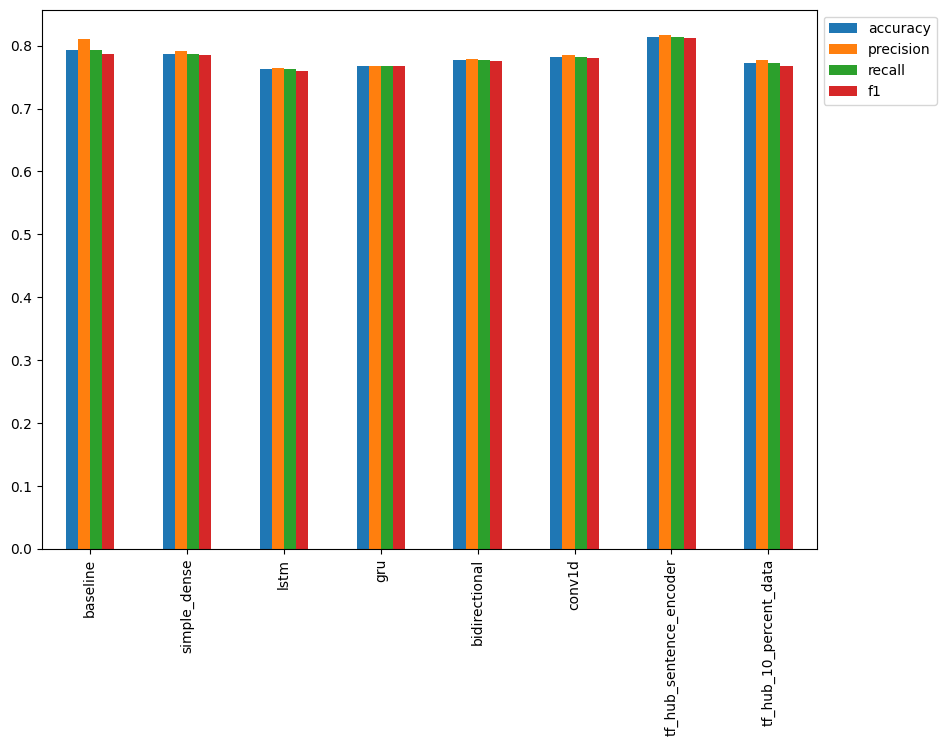

In [176]:
# Plot and compare all of the model results
all_model_results.plot(kind='bar', figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

<Axes: >

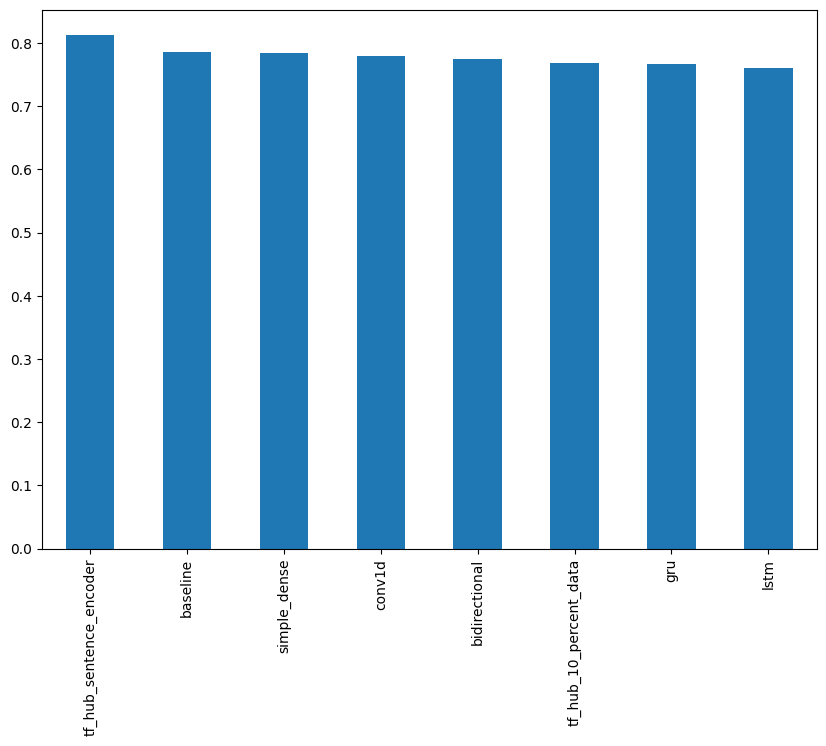

In [180]:
# Sort model results by f1-score
all_model_results.sort_values('f1',ascending=False)['f1'].plot(kind='bar',figsize=(10,7))

# Combining our models (model ensembling/stacking)
1. averaging
2. majority vote(mode)
3. model stacking

In [202]:
model_0.predict(val_sentences)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [204]:
model_0.predict_proba(val_sentences)[:5]

array([[0.44492454, 0.55507546],
       [0.29834345, 0.70165655],
       [0.13353977, 0.86646023],
       [0.78011348, 0.21988652],
       [0.63190603, 0.36809397]])

In [205]:
np.max(model_0.predict_proba(val_sentences), axis=1)

array([0.55507546, 0.70165655, 0.86646023, 0.78011348, 0.63190603,
       0.8216631 , 0.5759222 , 0.90335826, 0.73121414, 0.82175747,
       0.72656889, 0.52394377, 0.78874664, 0.85990459, 0.90877364,
       0.87109147, 0.87846787, 0.87260073, 0.59434736, 0.55768123,
       0.62345847, 0.93737665, 0.71027398, 0.84257072, 0.7558787 ,
       0.97981166, 0.92943199, 0.75007715, 0.92218957, 0.83603407,
       0.57944555, 0.68441511, 0.70495132, 0.83813779, 0.58736221,
       0.87253132, 0.93933872, 0.88000796, 0.95522955, 0.9329875 ,
       0.81106218, 0.91051663, 0.85158711, 0.63690339, 0.87949981,
       0.80344348, 0.75750542, 0.87545687, 0.66308916, 0.56489946,
       0.90814729, 0.52812079, 0.6131883 , 0.89730452, 0.97033107,
       0.95182906, 0.76126308, 0.85240681, 0.62003312, 0.9747031 ,
       0.56790281, 0.90979805, 0.6280113 , 0.81507794, 0.60608128,
       0.85391951, 0.62977395, 0.64135966, 0.94450267, 0.6026023 ,
       0.91391295, 0.9453055 , 0.59589294, 0.85944597, 0.84153

In [190]:
# model stacking
# get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1)
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [191]:
# calculate results from averaging the predictions probabilites
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 78.34645669291339,
 'precision': 0.783150063178731,
 'recall': 0.7834645669291339,
 'f1': 0.7830774138506091}

In [192]:
# Add our combined model's results to the results DataFrame
all_model_results.loc['ensemble_results'] = ensemble_results

In [195]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc['ensemble_results']['accuracy']= all_model_results.loc['ensemble_results']['accuracy']/100

In [206]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791492,0.787402,0.784697
lstm,0.762467,0.763753,0.762467,0.760380
gru,0.767717,0.767345,0.767717,0.767145
bidirectional,0.776903,0.778187,0.776903,0.775124
conv1d,0.782152,0.785310,0.782152,0.779659
tf_hub_sentence_encoder,0.813648,0.816389,0.813648,0.811958
tf_hub_10_percent_data,0.771654,0.777626,0.771654,0.767786
ensemble_results,0.783465,0.783150,0.783465,0.783077


How did the stacked model go against the other models?

> 🔑 **Note:** It seems many of our model's results are similar. This may mean there are some limitations to what can be learned from our data. When many of your modelling experiments return similar results, it's a good idea to revisit your data, we'll do this shortly.

In [197]:
# saving model
model_6.save('model_6_SavedModel_format')

In [199]:
!cp -a /content/model_6_SavedModel_format "/content/drive/MyDrive/Colab Notebooks/ML projects/Tensorflow projects/Tensorflow Developer Certificate/models/NLP/"

In [200]:
!cp -a /content/model_logs "/content/drive/MyDrive/Colab Notebooks/ML projects/Tensorflow projects/Tensorflow Developer Certificate/models/NLP/"

## Finding the most wrong examples

We mentioned before that if many of our modelling experiments are returning similar results, despite using different kinds of models, it's a good idea to return to the data and inspect why this might be.

One of the best ways to inspect your data is to sort your model's predictions and find the samples it got *most* wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

Once again, visualization is your friend. Visualize, visualize, visualize.

To make things visual, let's take our best performing model's prediction probabilities and classes along with the validation samples (text and ground truth labels) and combine them in a pandas DataFrame.

* If our best model still isn't perfect, what examples is it getting wrong?
* Which ones are the *most* wrong?
* Are there some labels which are wrong? E.g. the model gets it right but the ground truth label doesn't reflect this

In [207]:
# create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({'text':val_sentences,
                       'target':val_labels,
                       'pred':model_6_preds,
                       'pred_prob':tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.156349
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.742542
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.991433
3,@camilacabello97 Internally and externally scr...,1,0.0,0.223207
4,Radiation emergency #preparedness starts with ...,1,1.0,0.724101


In [209]:
# Find the wrong predictions and sort by prediction probabilites
most_wrong= val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob',ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.921709
628,@noah_anyname That's where the concentration c...,0,1.0,0.879459
759,FedEx will no longer transport bioterror patho...,0,1.0,0.877543
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.853219
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.829518
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.807157
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.798503
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.792515
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.779549
144,The Sound of Arson,0,1.0,0.776214


Finally, we can write some code to visualize the sample text, truth label, prediction class and prediction probability. Because we've sorted our samples by prediction probability, viewing samples from the head of our `most_wrong` DataFrame will show us false positives.

A reminder:
* `0` = Not a real diaster Tweet
* `1` = Real diaster Tweet

In [211]:
# check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, prob = row
  print(f'Target: {target}, Pred: {int(pred)}, Prob:{prob}')
  print(f'Text:\n{text}\n')
  print('----\n')

Target: 0, Pred: 1, Prob:0.9217091202735901
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob:0.8794590830802917
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob:0.8775425553321838
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob:0.8532192707061768
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob:0.8295184969902039
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob:0.807157039642334
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Prob:0.79

We can view the bottom end of our `most_wrong` DataFrame to inspect false negatives (model predicts 0, not a real diaster Tweet, when it should've predicted 1, real diaster Tweet).

In [212]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f'Target: {target}, Pred: {int(pred)}, Prob:{prob}')
  print(f'Text:\n{text}\n')
  print('----\n')

Target: 1, Pred: 0, Prob:0.06676620990037918
Text:
@BoyInAHorsemask its a panda trapped in a dogs body

----

Target: 1, Pred: 0, Prob:0.06280295550823212
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob:0.06146088242530823
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob:0.05780092626810074
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob:0.055693551898002625
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob:0.05185609683394432
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob:0.046759527176618576
Text:
Why are you deluged with low self-image? Take

## Making predictions on the test dataset

Alright we've seen how our model's perform on the validation set.

But how about the test dataset?

We don't have labels for the test dataset so we're going to have to make some predictions and inspect them for ourselves.

Let's write some code to make predictions on random samples from the test dataset and visualize them.

In [214]:
# Making predictions on the test dataset
test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f'Pred: {int(pred)}, Prob: {pred_prob}')
  print(f'Text:\n{test_sample}\n')
  print('-----\n')

1/1 [==============================] - 0s 92ms/step
Pred: 0, Prob: 0.039975591003894806
Text:
@CokeBoys__ yo best I screamed when I watched your snap chat of you smoking with that big ass cast ????

-----

1/1 [==============================] - 0s 94ms/step
Pred: 0, Prob: 0.28144270181655884
Text:
Burning bridges is my forte!

-----

1/1 [==============================] - 0s 69ms/step
Pred: 1, Prob: 0.8964086174964905
Text:
Pickup Truck Fire On Driscoll Bridge Snags Garden State Parkway #NewYork http://t.co/Q5YU2tZGte

-----

1/1 [==============================] - 0s 105ms/step
Pred: 0, Prob: 0.21037207543849945
Text:
@sunkxssedharry will you wear shorts for race ablaze ?

-----

1/1 [==============================] - 0s 68ms/step
Pred: 0, Prob: 0.14636339247226715
Text:
meltdown #1

-----

1/1 [==============================] - 0s 45ms/step
Pred: 1, Prob: 0.6455194354057312
Text:
WILD FIRES! http://t.co/EgrMdkXpOi

-----

1/1 [==============================] - 0s 48ms/step
Pred: 0, Pr

How do our model's predictions look on the test dataset?

It's important to do these kind of visualization checks as often as possible to get a glance of how your model performs on unseen data and subsequently how it might perform on the real test: Tweets from the wild.

In [215]:
# testing
tweet = 'WHat do you think how will this model will perform. it is about disaster so will it be able to predict?'

In [216]:
# function to take model and predict
def predict_on_sentence(model,sentence):
  """
  Uses model to make a prediction on sentence

  Return the sentence, the predicted label and the prediction probability
  """

  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f'Pred: {pred_label}', "(real disaster)" if pred_label > 0 else "(not real disaster)", f'Prob: {pred_prob[0][0]}')
  print(f'Text:\n{sentence}')

In [217]:
# Make a predictions on tweet
predict_on_sentence(model=model_6,
                    sentence=tweet)

1/1 [==============================] - 0s 71ms/step
Pred: 0.0 (not real disaster) Prob: 0.200306236743927
Text:
WHat do you think how will this model will perform. it is about disaster so will it be able to predict?


In [222]:
predict_on_sentence(model=model_6,
                    sentence='there is a news of tunnel collapse in uttrakhand')

1/1 [==============================] - 0s 204ms/step
Pred: 1.0 (real disaster) Prob: 0.7786002159118652
Text:
there is a news of tunnel collapse in uttrakhand


In [225]:
model_0.predict(['this tweet is about disaster'])

array([0])

In [226]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [227]:
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 41ms/step
Pred: 1.0 (real disaster) Prob: 0.9682265520095825
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [228]:
model_0.predict([beirut_tweet_1])

array([0])

In [229]:
predict_on_sentence(model=model_6,
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 64ms/step
Pred: 1.0 (real disaster) Prob: 0.9754825234413147
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


In [230]:
model_0.predict([beirut_tweet_2])

array([1])

In [ ]:
# i think even after good accuracy base model lacks some context information
# as beirut_tweet_1 is actually a disaster tweet
# because of embedding, the context meaning is better understood by the model

## The speed/score tradeoff

One of the final tests we're going to do is to find the speed/score tradeoffs between our best model and baseline model.

Why is this important?

Although it can be tempting to just choose the best performing model you find through experimentation, this model might not actually work in a production setting.

Put it this way, imagine you're Twitter and receive 1 million Tweets per hour (this is a made up number, the actual number is much higher). And you're trying to build a diaster detection system to read Tweets and alert authorities with details about a diaster in close to real-time.

Compute power isn't free so you're limited to a single compute machine for the project. On that machine, one of your models makes 10,000 predictions per second at 80% accuracy where as another one of your models (a larger model) makes 100 predictions per second at 85% accuracy.

Which model do you choose?

Is the second model's performance boost worth missing out on the extra capacity?

Of course, there are many options you could try here, such as sending as many Tweets as possible to the first model and then sending the ones which the model is least certain of to the second model.

The point here is to illustrate the best model you find through experimentation, might not be the model you end up using in production.

To make this more concrete, let's write a function to take a model and a number of samples and time how long the given model takes to make predictions on those samples.

In [233]:
# calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """

  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time - start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find predictions time per sample
  return total_time, time_per_pred

In [234]:
# Calulate TF Hub Sentence Encoder Prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 1s 21ms/step


(0.612944188000256, 0.0008043886981630656)

In [235]:
# Calulate Naive Bayes predictions times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.06145392200050992, 8.064819160171906e-05)

It seems with our current hardware (in my case, I'm using a Google Colab notebook) our best performing model takes over 10x the time to make predictions as our baseline model.

Is that extra prediction time worth it?

Let's compare time per prediction versus our model's F1-scores.

Text(0, 0.5, 'F1-score')

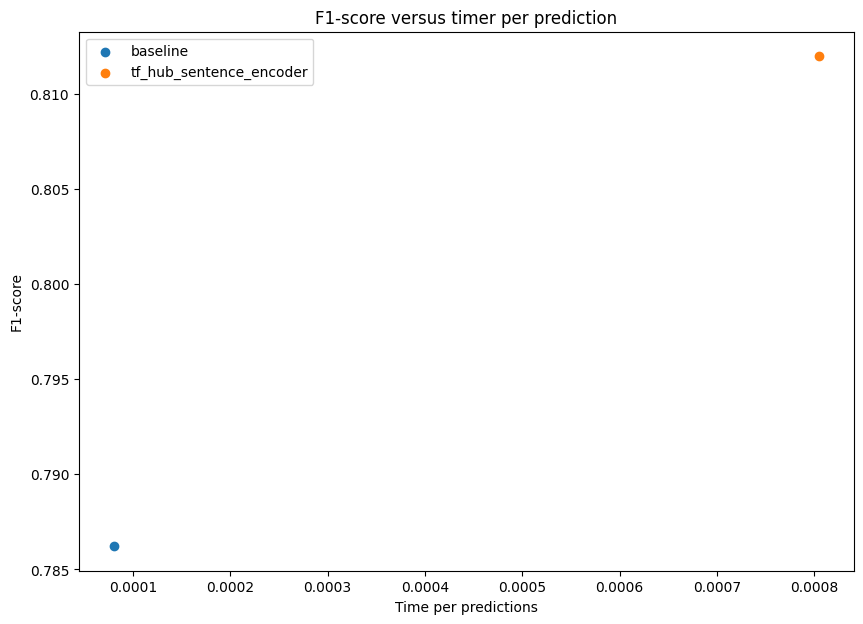

In [236]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred, baseline_results['f1'], label='baseline')
plt.scatter(model_6_time_per_pred, model_6_results['f1'], label='tf_hub_sentence_encoder')
plt.legend()
plt.title('F1-score versus timer per prediction')
plt.xlabel('Time per predictions')
plt.ylabel('F1-score')

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-ideal-performance-speed-of-pred-tradeoff-highlighted.png)
*Ideal position for speed and performance tradeoff model (fast predictions with great results).*

Of course, the ideal position for each of these dots is to be in the top left of the plot (low time per prediction, high F1-score).

In our case, there's a clear tradeoff for time per prediction and performance. Our best performing model takes an order of magnitude longer per prediction but only results in a few F1-score point increase.

This kind of tradeoff is something you'll need to keep in mind when incorporating machine learning models into your own applications.

> as we see base model f1 is little less than model_6 about ~0.0257 but to get achieve this f1 score the time taken is approximately ~8 times more per prediction.
so keep in mind speed/score tradeoff for production environment

In [237]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791492,0.787402,0.784697
lstm,0.762467,0.763753,0.762467,0.760380
gru,0.767717,0.767345,0.767717,0.767145
bidirectional,0.776903,0.778187,0.776903,0.775124
conv1d,0.782152,0.785310,0.782152,0.779659
tf_hub_sentence_encoder,0.813648,0.816389,0.813648,0.811958
tf_hub_10_percent_data,0.771654,0.777626,0.771654,0.767786
ensemble_results,0.783465,0.783150,0.783465,0.783077


In [238]:
0.786219-0.811958

-0.025738999999999956